In [44]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

from typing import Dict, List, Any
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
from sklearn.preprocessing import StandardScaler

In [2]:
class SpotifyService():
    def __init__(self, scope) -> None:
        self.scope = scope
        #self.saved_tracks = saved_tracks
        #self.saved_tracks_audio_analysis = saved_tracks_audio_analysis
        self.spotify = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))
        self.saved_tracks = self.current_user_saved_tracks()

    def get_recently_played(self) -> List[Dict]:
        r = self.spotify.current_user_recently_played()
        recently_played = []
        for idx, item in enumerate(r['items']):
            track = item['track']
            recently_played_song = {}
            recently_played_song['artists'] = track['artists'][0]['name']
            recently_played_song['name'] = track['name']
            recently_played.append(recently_played_song)
            print(idx, recently_played_song['artists'],
                  " – ", recently_played_song['name'])
        return recently_played
    
    def current_user_saved_tracks(self):
        r = self.spotify.current_user_saved_tracks(limit=50)
        saved_tracks = {}
        for i in range(len(r['items'])):
            track_dict = {}
            track_dict['track'] = r['items'][i]['track']['name']
            track_dict['track_id'] = r['items'][i]['track']['id']
            track_dict['track_uri'] = r['items'][i]['track']['uri']
            track_dict['artist'] = r['items'][i]['track']['artists'][0]['name']
            track_dict['artist_id'] = r['items'][i]['track']['artists'][0]['id']
            track_dict['artist_uri'] = r['items'][i]['track']['artists'][0]['uri']
            track_dict['popularity'] = r['items'][i]['track']['popularity']
            track_dict['duration_ms'] = r['items'][i]['track']['duration_ms']
            saved_tracks[r['items'][i]['track']['uri']] = track_dict
        return saved_tracks
    
    def get_audio_analyis(self, track_ids=None):
        """
        track_ids = list
        """
        if track_ids==None:
            track_ids = self.saved_tracks.keys()
            r = self.spotify.audio_features(tracks=list(track_ids))
            saved_tracks_audio_analysis = saved_tracks_audio_analysis = dict(zip(track_ids, r))
        else:
            r = self.spotify.audio_features(tracks=track_ids)
            saved_tracks_audio_analysis = dict(zip(track_ids, r))
        return saved_tracks_audio_analysis

In [3]:
spotify = SpotifyService(scope='user-read-recently-played user-library-read')

In [49]:
recently_played = spotify.get_recently_played()

0 blink-182  –  All The Small Things
1 Nine Days  –  Absolutely (Story of a Girl) - Radio Mix
2 Fall Out Boy  –  Dance, Dance
3 Oasis  –  Don't Look Back In Anger - Remastered
4 The La's  –  There She Goes
5 Counting Crows  –  Accidentally In Love - From "Shrek 2" Soundtrack
6 Lofi Fruits Music  –  Somebody that I Used to Know
7 Flyte  –  Everyone's A Winner
8 Michelle Branch  –  Everywhere
9 The Snuts  –  Somebody Loves You
10 Flyte  –  I've Got A Girl
11 All Time Low  –  Trouble Is...
12 All Time Low  –  Sleeping In
13 The Snuts  –  All Your Friends
14 Keelan Donovan  –  Like a Radio
15 Sea Girls  –  Damage Done
16 Flyte  –  Easy Tiger
17 NOISY  –  24/7
18 Lofi Fruits Music  –  Yellow
19 Lofi Fruits Music  –  Steven Universe
20 Lofi Fruits Music  –  I'm Yours
21 Lofi Fruits Music  –  Do I Wanna Know?
22 Flyte  –  Never Get To Heaven
23 Flyte  –  Mistress America
24 Flyte  –  Mistress America
25 Flyte  –  There's A Woman
26 Flyte  –  Love is an Accident
27 Flyte  –  Under The Skin
28 

In [50]:
audio_analysis = spotify.get_audio_analyis()
audio_analysis

{'spotify:track:5yyRH93h4Pm6tXXYTxt7ea': {'danceability': 0.342,
  'energy': 0.2,
  'key': 4,
  'loudness': -13.569,
  'mode': 1,
  'speechiness': 0.0324,
  'acousticness': 0.134,
  'instrumentalness': 0.000153,
  'liveness': 0.341,
  'valence': 0.0743,
  'tempo': 133.113,
  'type': 'audio_features',
  'id': '5yyRH93h4Pm6tXXYTxt7ea',
  'uri': 'spotify:track:5yyRH93h4Pm6tXXYTxt7ea',
  'track_href': 'https://api.spotify.com/v1/tracks/5yyRH93h4Pm6tXXYTxt7ea',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5yyRH93h4Pm6tXXYTxt7ea',
  'duration_ms': 286653,
  'time_signature': 4},
 'spotify:track:3t1DiLOBu12YdFjmg7M8hl': {'danceability': 0.335,
  'energy': 0.967,
  'key': 3,
  'loudness': -4.398,
  'mode': 1,
  'speechiness': 0.103,
  'acousticness': 0.000439,
  'instrumentalness': 7.13e-06,
  'liveness': 0.217,
  'valence': 0.382,
  'tempo': 182.919,
  'type': 'audio_features',
  'id': '3t1DiLOBu12YdFjmg7M8hl',
  'uri': 'spotify:track:3t1DiLOBu12YdFjmg7M8hl',
  'track_href': '

In [51]:
audio_analysis_df = pd.DataFrame.from_dict(audio_analysis, orient='index')
audio_analysis_df.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
spotify:track:5yyRH93h4Pm6tXXYTxt7ea,0.342,0.200,4,-13.569,1,0.0324,0.134000,0.000153,0.341,0.0743,133.113,audio_features,5yyRH93h4Pm6tXXYTxt7ea,spotify:track:5yyRH93h4Pm6tXXYTxt7ea,https://api.spotify.com/v1/tracks/5yyRH93h4Pm6...,https://api.spotify.com/v1/audio-analysis/5yyR...,286653,4
spotify:track:3t1DiLOBu12YdFjmg7M8hl,0.335,0.967,3,-4.398,1,0.1030,0.000439,0.000007,0.217,0.3820,182.919,audio_features,3t1DiLOBu12YdFjmg7M8hl,spotify:track:3t1DiLOBu12YdFjmg7M8hl,https://api.spotify.com/v1/tracks/3t1DiLOBu12Y...,https://api.spotify.com/v1/audio-analysis/3t1D...,240667,4


In [52]:
audio_analysis_df.describe(include='all')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50,50,50,50,50,50.000000,50.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50,50,50,50,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,audio_features,1Z1gV6g7qRligFlJ2Z7bYq,spotify:track:0BSPnoI7LLLg5SnOSmXhtC,https://api.spotify.com/v1/tracks/41gi9iAWpFW3...,https://api.spotify.com/v1/audio-analysis/0gKK...,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,1,1,1,1,NaN,NaN
mean,0.578600,0.684680,5.760000,-6.88786,0.780000,0.054800,0.189728,0.010010,0.179142,0.522842,123.502200,NaN,NaN,NaN,NaN,NaN,216690.680000,4.020000
std,0.119423,0.206853,3.425951,2.55075,0.418452,0.053320,0.264796,0.051850,0.139029,0.248210,22.824682,NaN,NaN,NaN,NaN,NaN,40879.691828,0.141421
min,0.335000,0.200000,0.000000,-13.56900,0.000000,0.024600,0.000162,0.000000,0.057200,0.074300,80.426000,NaN,NaN,NaN,NaN,NaN,115880.000000,4.000000
25%,0.505750,0.573750,2.250000,-8.55350,1.000000,0.031250,0.008160,0.000000,0.095025,0.356250,110.628750,NaN,NaN,NaN,NaN,NaN,194043.250000,4.000000
50%,0.570500,0.744000,6.000000,-6.35050,1.000000,0.037550,0.051500,0.000023,0.123000,0.551500,121.739000,NaN,NaN,NaN,NaN,NaN,212733.500000,4.000000
75%,0.663250,0.832500,9.000000,-5.12850,1.000000,0.048275,0.266750,0.001486,0.215500,0.712000,133.760250,NaN,NaN,NaN,NaN,NaN,237241.500000,4.000000


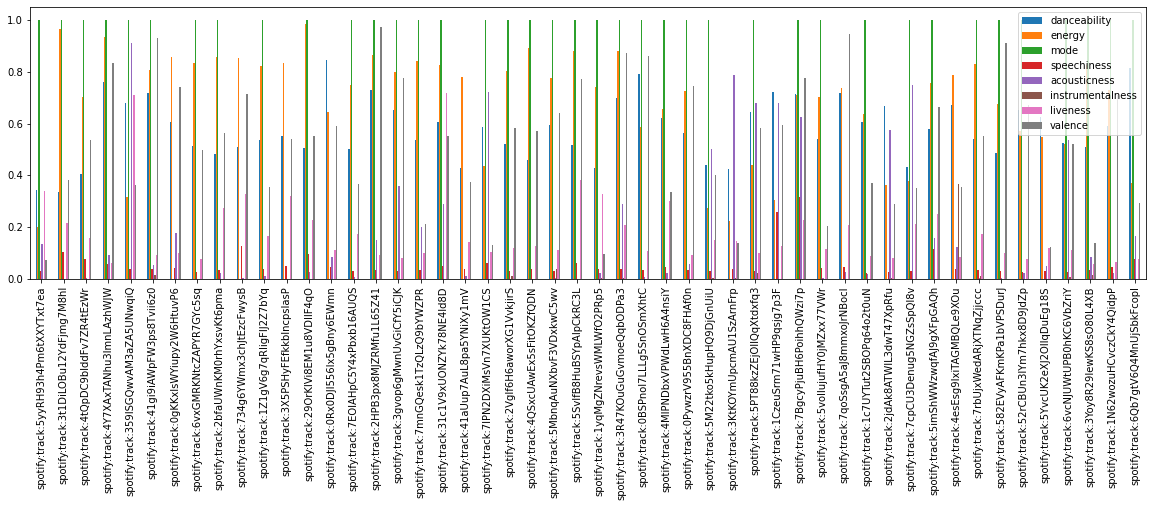

In [53]:
AUDIO_FEATURES = ['danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
audio_analysis_df[AUDIO_FEATURES].plot(kind='bar');